# Regression – Fuel Consumption Prediction 

Goal: predict fuel/energy consumption using aviation-style operational data.
This notebook focuses on regression fundamentals, data exploration, and model evaluation.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Environment ready ✅")


Environment ready ✅


In [25]:
df = pd.read_csv('/Users/mykael/ml-fundamentals/data/energy.csv')

df.head() # Display the first few rows of the dataframe
df.info() # Display information about the dataframe
df.describe() # Display summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Census Division and State                                                 62 non-null     object
 1    Total Energy Consumption Utility scale facilities All sectors Year 2021  62 non-null     int64 
 2    Total Energy Consumption Utility scale facilities All sectors Year 2020  62 non-null     int64 
 3    Percentage Change                                                        62 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


,Total Energy Consumption Utility scale facilities All sectors Year 2021,Total Energy Consumption Utility scale facilities All sectors Year 2020
count,62.000000,62.000000
mean,12173.500000,13803.596774
std,35689.188271,40363.525803
min,0.000000,0.000000
25%,837.500000,1007.750000
50%,1966.500000,1976.500000
75%,7560.750000,9120.250000
max,251585.000000,285274.000000


In [26]:
#selection of features and target variable
X = df[[" Total Energy Consumption Utility scale facilities All sectors Year 2020"]] #my features in this model being waht i am going to use for my predictions
y = df[" Total Energy Consumption Utility scale facilities All sectors Year 2021"]#my target variable is what i am trying to predict

In [27]:
from sklearn.model_selection import train_test_split #importing train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting data into training and testing sets(20% test size) 



In [28]:
#df[df['Energy_2020'].str.contains('%', na=False)]
#df[df['Energy_2021'].str.contains('%', na=False)]
df.head()


,Census Division and State,Total Energy Consumption Utility scale facilities All sectors Year 2021,Total Energy Consumption Utility scale facilities All sectors Year 2020,Percentage Change
0,New England,6258,6689,-6.4%
1,Connecticut,478,326,46.5%
2,Maine,2541,3158,-19.5%
3,Massachusetts,1118,844,32.5%
4,New Hampshire,1025,1228,-16.5%


In [29]:

model = LinearRegression() #create an empty linear regression model(y = m * X + b) 

model.fit(X_train, y_train) #finds the best slope(m) by finding where intercept(b) minimizes the error between predicted and actual values
y_pred = model.predict(X_test) #make predictions(apply what i already learned in model.fit) on the test set

print(model.coef_)#slope (m)
print(model.intercept_)#intercept (b)



[0.88120468]
-91.69575436599735


In [30]:

#mse takes the actual values and predicted values as input and calculates the average of the squared differences between them
#to avoid positive and negative differences canceling each other out and to penalize larger errors more heavily
#actual objective function linerar regression tries to minimize during training
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


r2 = r2_score(y_test, y_pred) #provides a measure of how well the model explains the variability of the target variable
print("R²:", r2)

#NB: A higher R² value (closer to 1) indicates a better fit, while a lower value (closer to 0) suggests a poorer fit.
#NB : a  higher MSE indicates a WORSE model performance, as it means that the average squared difference between the 
    # predicted and actual values is larger.
#NB: in a business model wants low mse whiles scintific model wants high R²

print("Slope (m):", model.coef_[0]) #print the slope (m) of the linear regression model
print("Intercept (b):", model.intercept_)#print the intercept (b) of the linear regression model

import numpy as np
rmse = np.sqrt(2307727.2468873514)
rmse
print("RMSE:", rmse)



MSE: 2307727.2468873514
R²: 0.9938929192143183
Slope (m): 0.8812046806313787
Intercept (b): -91.69575436599735
RMSE: 1519.1205504789116


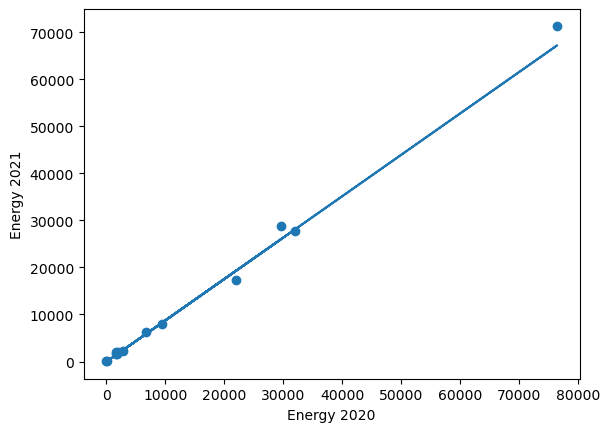

In [31]:
#data visualization

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Energy 2020")
plt.ylabel("Energy 2021")
plt.show()


In [32]:
#The linear regression model achieved an R² of 0.99, indicating that prior-year energy consumption explains the vast majority 
# of variation in current-year consumption. 
#The RMSE of approximately 1,500 units suggests relatively small prediction errors compared to the overall scale of the data.”

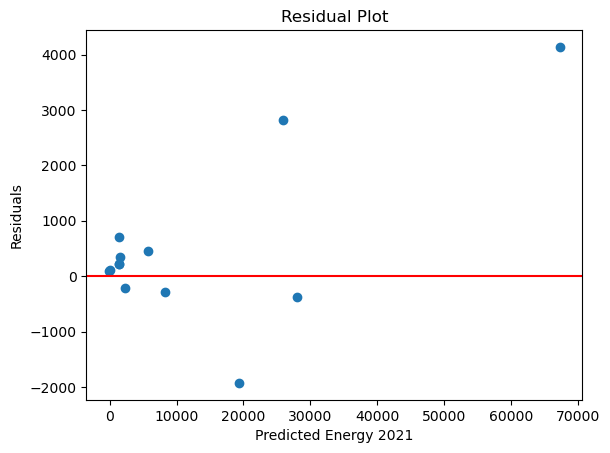

In [33]:
#residual plot

residuals = y_test - y_pred #calculate residuals (differences between actual and predicted values)

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Energy 2021")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#good residual plot because points cenrtered around horizontal line at 0 and the ones far from the line is normal beacuse 
# of outliers
